In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

df = pd.read_csv('교통량_날씨데이터.csv')
df = df.drop(['Unnamed: 0', '주말_명절'], axis=1)
df

,날짜,시간,현대자동차 수원서비스센터 앞(용인방면)_교통량,한화생명연수원 입구(판교방면)_교통량,한결 앞(광주방면)_교통량,풍덕천교 앞(수원방면)_교통량,죽전2동 주민센터 앞(수원방면)_교통량,용인효자병원3R(수원방면)_교통량,용인차량등록사업소 앞(수원방면)_교통량,용인시청앞(이천방면)_교통량,용인 포은아트홀 건너편(광주방면)_교통량,장애인복지관앞(성남방면)_교통량,장애인복지관앞(용인방면)_교통량,죽전지하차도출구(성남방면)_교통량,죽전지하차도출구(용인방면)_교통량,지곡동:지봉마을(시청방면)_교통량,강수,강수형태,기온,습도,풍속,물류센터조달청(성남방면)_교통량,물류센터조달청(수지방면)_교통량,민속촌 입구(수원방면)_교통량,민속촌 입구(이천방면)_교통량,보라 이마트(성남방면)_교통량,보라 이마트(오산방면)_교통량,보정역(성남방면)_교통량,보정역(오산방면)_교통량,삼막곡지하차도(광교방면)_교통량,삼막곡지하차도(구성방면)_교통량,상미교 앞(성남방면)_교통량,상미교 뒤(오산방면)_교통량,세브란스병원부지앞(성남방면)_교통량,세브란스병원부지앞(시청방면)_교통량,소실마을입구(오산방면)_교통량,수원CC사거리(시청방면)_교통량,아모레퍼시픽 삼거리(성남방면)_교통량,아모레퍼시픽 삼거리(오산방면)_교통량,에너지관리공단삼거리(광주방면)_교통량,연수원~삼막곡 서측(삼막곡방면)_교통량,오뚜기식품삼거리(이천방면)_교통량,신갈교입구사거리(성남방면)_교통량,신갈교입구사거리(오산방면)_교통량,신갈생태통로(시청방면)_교통량,신갈생태통로(수원방면)_교통량,신갈우회도로(시청방면)_교통량,신갈우회도로(수원방면)_교통량,연수원-삼막곡도로 동측(광교방면)_교통량,연수원-삼막곡도로 동측(동백방면)_교통량,경인주유소앞(오산방면)_교통량,경인주유소앞(용인방면)_교통량,나곡초교입구 삼거리 이전(수원방면)_교통량,나곡초교입구 삼거리 이전(이천방면)_교통량,동백터널(동백방면)_교통량,동백터널(마성방면)_교통량,거영중기_광주방면_교통량,광교_상현IC_수원방면_교통량,광교_상현IC_죽전방면_교통량,기아자동차 앞_수원방면_교통량,동백궁앞_성남방면_교통량,동백궁앞_시청방면_교통량,동부아파트삼거리_수원방면_교통량,마북IC_동백방면_교통량,마북IC_성남방면_교통량
0,2023-11-01,0,485,307,239,508,505,120,211,300,476,287,431,366,560,60,0.0,0.0,17.000000,85.0,0.8,476,441,195,234,412,564,157,224,460,529,399,329,254,284,443,302,277,511,511,328,112,141,222,257,119,239,181,268,409,374,267,168,155,170,151,233,330,379,476,335,336,263,160,160
1,2023-11-01,100,289,202,159,331,285,68,139,195,291,237,318,274,362,23,0.0,0.0,18.000000,83.0,0.7,314,271,126,178,306,377,89,127,303,327,293,241,166,156,246,219,206,382,382,179,61,94,150,203,67,209,131,139,229,266,206,105,127,119,91,163,208,225,281,196,194,194,115,115
2,2023-11-01,200,195,150,119,210,220,56,109,134,196,186,213,219,265,28,0.0,0.0,20.500000,76.0,1.4,211,176,96,129,195,320,75,86,196,199,238,141,167,130,164,129,139,338,338,141,48,61,130,138,76,146,127,120,182,237,126,81,113,68,76,147,172,171,221,179,148,154,92,92
3,2023-11-01,300,199,101,118,203,233,61,118,107,178,154,174,179,168,25,0.0,0.0,22.000000,70.0,1.6,179,136,128,110,250,361,55,82,237,204,159,172,117,105,186,103,149,319,319,189,45,75,110,145,53,154,95,123,149,255,189,87,94,67,70,110,138,150,196,151,119,125,111,111
4,2023-11-01,400,356,197,200,264,310,82,139,188,269,291,183,329,255,34,0.0,0.0,21.400000,72.0,0.9,299,185,199,173,501,521,107,67,274,311,250,308,210,214,308,127,314,423,423,324,65,153,134,274,75,297,147,229,214,330,385,126,174,129,176,194,274,269,254,237,195,192,159,159
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7987,2024-09-30,1900,2555,1523,1213,2150,1676,555,1479,1296,1600,992,1002,1312,1361,217,0.0,0.0,16.799999,98.0,0.8,1969,2106,884,1106,2178,2425,814,1177,2971,2604,2439,1682,2105,1689,2244,1221,1410,1852,1852,2870,423,971,1026,1352,599,1116,1925,2381,1741,1550,1095,1010,524,1642,783,1466,1704,1906,1847,2168,2069,1332,973,973
7988,2024-09-30,2000,2157,1293,912,1770,1585,432,916,1049,1341,888,914,1228,1385,166,0.0,0.0,17.500000,96.0,0.4,1640,1941,793,939,1920,2114,603,987,2444,2130,2235,1434,1499,1339,1972,1104,1479,1799,1799,1979,378,688,906,1101,534,964,1594,1598,1535,1382,1074,813,380,1174,638,1173,1273,1589,1778,1665,1318,961,792,792
7989,2024-09-30,2100,1875,1212,742,1502,1321,311,742,850,1139,802,860,1025,1349,133,0.0,1.0,17.900000,93.0,0.3,1498,1500,617,815,1652,1593,466,773,1750,1829,1707,1028,1099,1062,1478,927,1179,1468,1468,1431,304,550,693,962,320,894,898,1089,1353,1072,855,597,281,809,551,880,1028,1319,1532,1379,1237,812,712,712
7990,2024-09-30,2200,1438,744,626,1463,1096,207,559,640,930,542,791,699,1071,88,0.0,1.0,18.200001,94.0,1.2,1085,1117,427,518,969,1355,325,645,1421,1400,1318,896,807,873,1198,717,777,1129,1129,1264,214,346,575,737,204,658,545,1032,1088,933,564,511,202,625,511,669,1000,977,1267,1028,979,680,473,473


## 결측치 처리(수정)

In [22]:
df.fillna(0, inplace=True)
df.isna().sum()

날짜                           0
시간                           0
현대자동차 수원서비스센터 앞(용인방면)_교통량    0
한화생명연수원 입구(판교방면)_교통량         0
한결 앞(광주방면)_교통량               0
                            ..
동백궁앞_성남방면_교통량                0
동백궁앞_시청방면_교통량                0
동부아파트삼거리_수원방면_교통량            0
마북IC_동백방면_교통량                0
마북IC_성남방면_교통량                0
Length: 65, dtype: int64

## column type 변경

In [23]:
# Replace '-' with 0 in the columns containing '교통량'
for col in df.columns:
    if '교통량' in col:
        df[col] = df[col].astype(str).str.replace('-', '0').astype(int) # Convert to string first to use str.replace

## 새로운 column 생성

In [24]:
from datetime import datetime

# 날짜 열을 datetime 형식으로 변환
df['날짜'] = pd.to_datetime(df['날짜'])

# 출퇴근시간 열 추가
df['출퇴근시간'] = 0
df['출근시간'] = 0
df['퇴근시간'] = 0

# 주말과 명절을 위한 열 추가
df['주말'] = 0  # 기본값 0으로 설정
df['공휴일'] = 0  # 기본값 0으로 설정

# 주말과 명절을 위한 열 추가
df['월~목'] = 0  # 기본값 0으로 설정
df['금'] = 0  # 기본값 0으로 설정



df['시간'] = df['시간'] / 100
df.loc[df['시간'].isin([8,9, 18, 19]), '출퇴근시간'] = 1
df.loc[df['시간'].isin([8,9]), '출근시간'] = 1
df.loc[df['시간'].isin([18,19]), '퇴근시간'] = 1


# 주말 체크 (토요일: 5, 일요일: 6)
df.loc[df['날짜'].dt.weekday >= 5, '주말'] = 1

# 명절 날짜 리스트 (예시로 2023년과 2024년의 설날과 추석을 포함)
holidays = ['23-12-25', '24-01-01', '2024-02-09', '2024-02-10', '2024-02-11', '2024-02-12', '24-03-01', '24-04-10', '24-05-01', '24-05-06',
            '24-05-15', '24-06-06', '24-08-15',
            '2024-09-14', '2024-09-15', '2024-09-16', '2024-09-17', '2024-09-18']  # 2024 추석
holidays = pd.to_datetime(holidays)

# 명절 날짜에 해당하는 경우 '명절' 값을 1로 설정
df.loc[df['날짜'].isin(holidays), '공휴일'] = 1



# 주말 체크 (토요일: 5, 일요일: 6)
df.loc[df['날짜'].dt.weekday < 4, '월~목'] = 1
df.loc[df['날짜'].dt.weekday == 4, '금'] = 1

df['요일'] = df['날짜'].dt.weekday
df['요일'].replace({0:'월', 1:'화', 2:'수', 3:'목', 4:'금', 5:'토', 6:'일'}, inplace=True)

df.head()

C:\Users\yeonn\AppData\Local\Temp\ipykernel_32664\159556615.py:34: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  holidays = pd.to_datetime(holidays)
C:\Users\yeonn\AppData\Local\Temp\ipykernel_32664\159556615.py:46: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['요일'].replace({0:'월', 1:'화', 2:'수', 3:'목', 4:'금', 5:'토', 6:'일'}, inplace=True)


,날짜,시간,현대자동차 수원서비스센터 앞(용인방면)_교통량,한화생명연수원 입구(판교방면)_교통량,한결 앞(광주방면)_교통량,풍덕천교 앞(수원방면)_교통량,죽전2동 주민센터 앞(수원방면)_교통량,용인효자병원3R(수원방면)_교통량,용인차량등록사업소 앞(수원방면)_교통량,용인시청앞(이천방면)_교통량,용인 포은아트홀 건너편(광주방면)_교통량,장애인복지관앞(성남방면)_교통량,장애인복지관앞(용인방면)_교통량,죽전지하차도출구(성남방면)_교통량,죽전지하차도출구(용인방면)_교통량,지곡동:지봉마을(시청방면)_교통량,강수,강수형태,기온,습도,풍속,물류센터조달청(성남방면)_교통량,물류센터조달청(수지방면)_교통량,민속촌 입구(수원방면)_교통량,민속촌 입구(이천방면)_교통량,보라 이마트(성남방면)_교통량,보라 이마트(오산방면)_교통량,보정역(성남방면)_교통량,보정역(오산방면)_교통량,삼막곡지하차도(광교방면)_교통량,삼막곡지하차도(구성방면)_교통량,상미교 앞(성남방면)_교통량,상미교 뒤(오산방면)_교통량,세브란스병원부지앞(성남방면)_교통량,세브란스병원부지앞(시청방면)_교통량,소실마을입구(오산방면)_교통량,수원CC사거리(시청방면)_교통량,아모레퍼시픽 삼거리(성남방면)_교통량,아모레퍼시픽 삼거리(오산방면)_교통량,에너지관리공단삼거리(광주방면)_교통량,연수원~삼막곡 서측(삼막곡방면)_교통량,오뚜기식품삼거리(이천방면)_교통량,신갈교입구사거리(성남방면)_교통량,신갈교입구사거리(오산방면)_교통량,신갈생태통로(시청방면)_교통량,신갈생태통로(수원방면)_교통량,신갈우회도로(시청방면)_교통량,신갈우회도로(수원방면)_교통량,연수원-삼막곡도로 동측(광교방면)_교통량,연수원-삼막곡도로 동측(동백방면)_교통량,경인주유소앞(오산방면)_교통량,경인주유소앞(용인방면)_교통량,나곡초교입구 삼거리 이전(수원방면)_교통량,나곡초교입구 삼거리 이전(이천방면)_교통량,동백터널(동백방면)_교통량,동백터널(마성방면)_교통량,거영중기_광주방면_교통량,광교_상현IC_수원방면_교통량,광교_상현IC_죽전방면_교통량,기아자동차 앞_수원방면_교통량,동백궁앞_성남방면_교통량,동백궁앞_시청방면_교통량,동부아파트삼거리_수원방면_교통량,마북IC_동백방면_교통량,마북IC_성남방면_교통량,출퇴근시간,출근시간,퇴근시간,주말,공휴일,월~목,금,요일
0,2023-11-01,0.0,485,307,239,508,505,120,211,300,476,287,431,366,560,60,0.0,0.0,17.0,85.0,0.8,476,441,195,234,412,564,157,224,460,529,399,329,254,284,443,302,277,511,511,328,112,141,222,257,119,239,181,268,409,374,267,168,155,170,151,233,330,379,476,335,336,263,160,160,0,0,0,0,0,1,0,수
1,2023-11-01,1.0,289,202,159,331,285,68,139,195,291,237,318,274,362,23,0.0,0.0,18.0,83.0,0.7,314,271,126,178,306,377,89,127,303,327,293,241,166,156,246,219,206,382,382,179,61,94,150,203,67,209,131,139,229,266,206,105,127,119,91,163,208,225,281,196,194,194,115,115,0,0,0,0,0,1,0,수
2,2023-11-01,2.0,195,150,119,210,220,56,109,134,196,186,213,219,265,28,0.0,0.0,20.5,76.0,1.4,211,176,96,129,195,320,75,86,196,199,238,141,167,130,164,129,139,338,338,141,48,61,130,138,76,146,127,120,182,237,126,81,113,68,76,147,172,171,221,179,148,154,92,92,0,0,0,0,0,1,0,수
3,2023-11-01,3.0,199,101,118,203,233,61,118,107,178,154,174,179,168,25,0.0,0.0,22.0,70.0,1.6,179,136,128,110,250,361,55,82,237,204,159,172,117,105,186,103,149,319,319,189,45,75,110,145,53,154,95,123,149,255,189,87,94,67,70,110,138,150,196,151,119,125,111,111,0,0,0,0,0,1,0,수
4,2023-11-01,4.0,356,197,200,264,310,82,139,188,269,291,183,329,255,34,0.0,0.0,21.4,72.0,0.9,299,185,199,173,501,521,107,67,274,311,250,308,210,214,308,127,314,423,423,324,65,153,134,274,75,297,147,229,214,330,385,126,174,129,176,194,274,269,254,237,195,192,159,159,0,0,0,0,0,1,0,수


## 시각화

'apt-get'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.


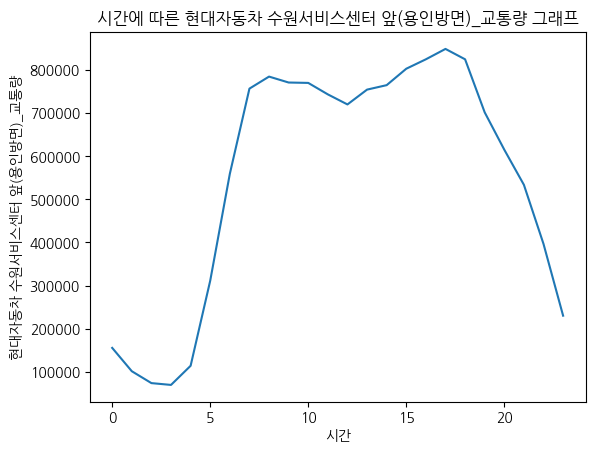

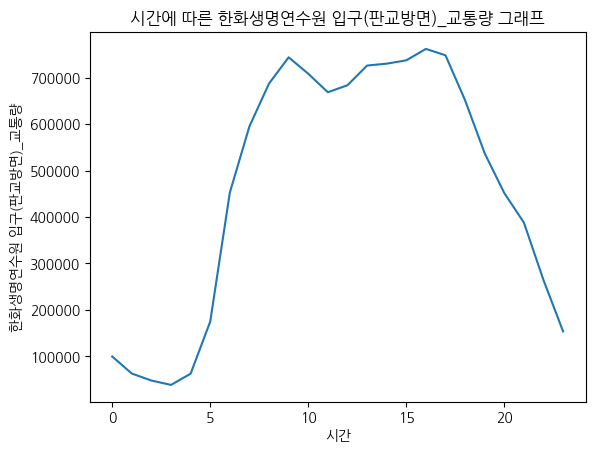

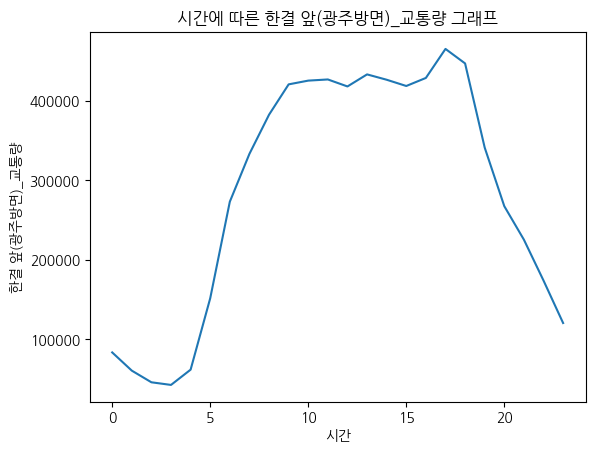

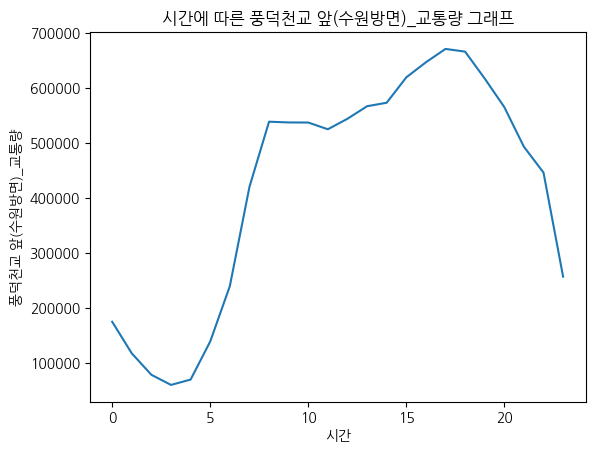

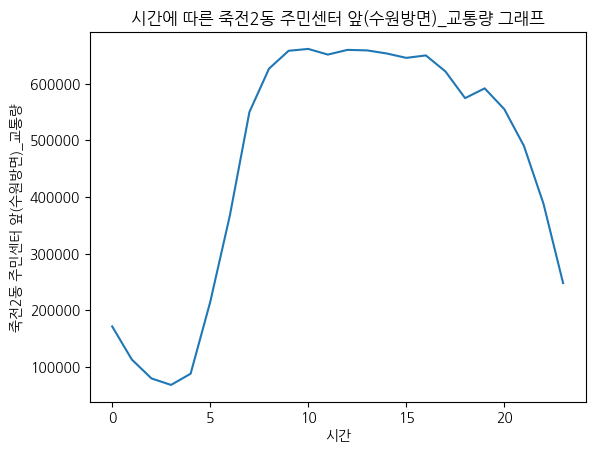

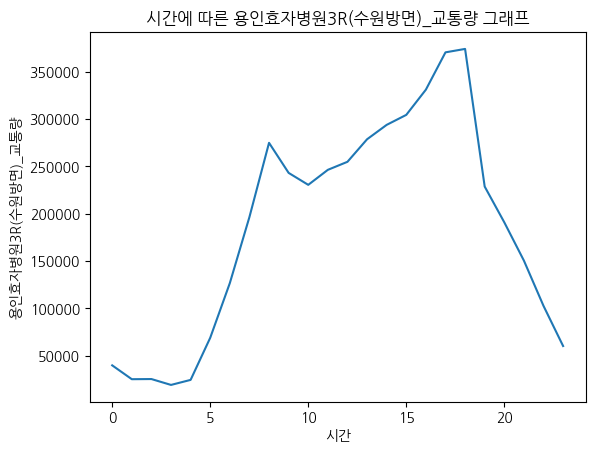

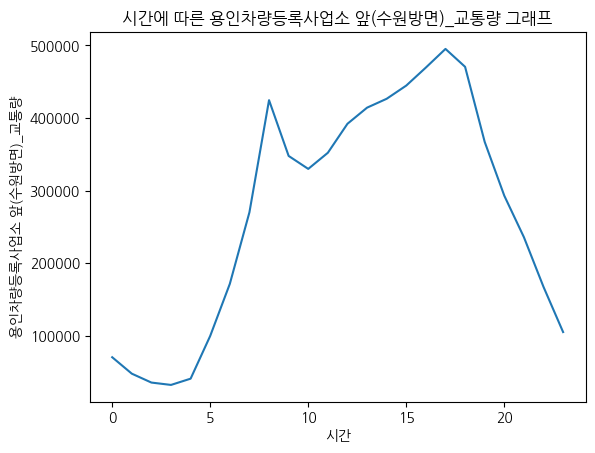

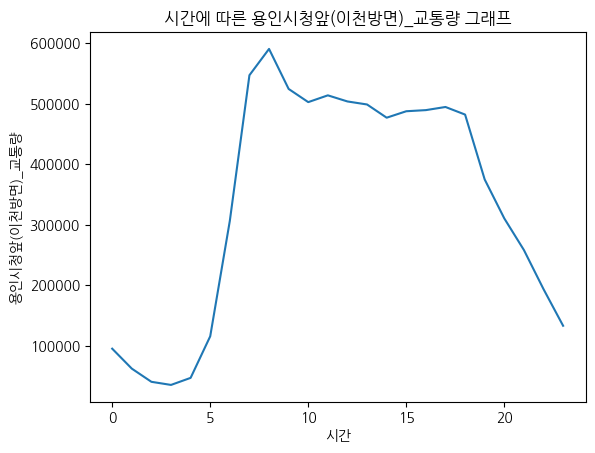

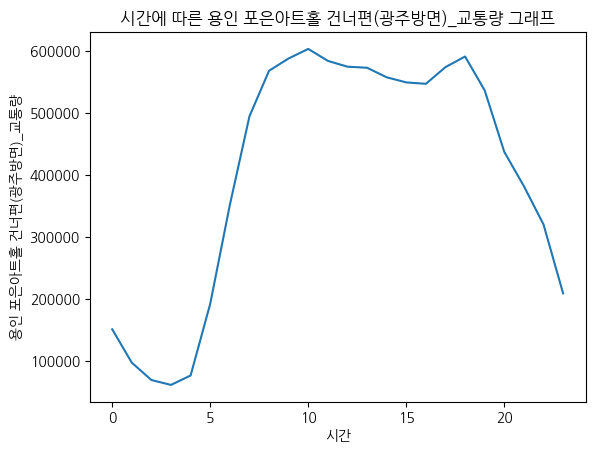

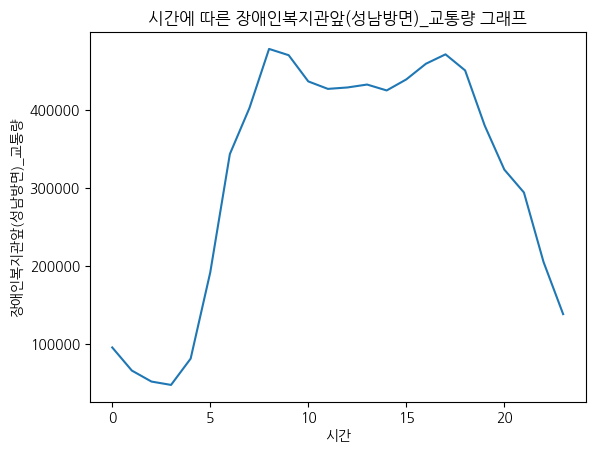

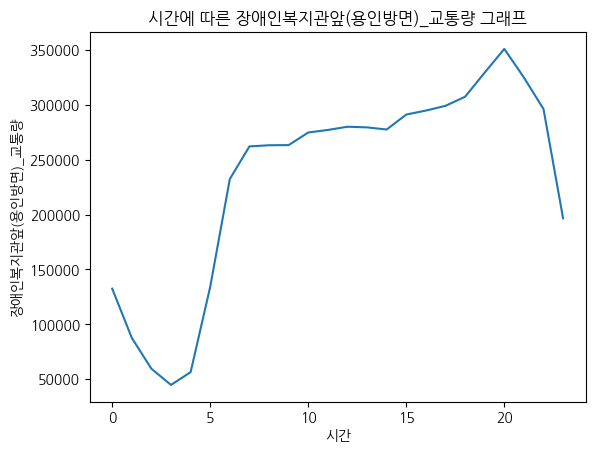

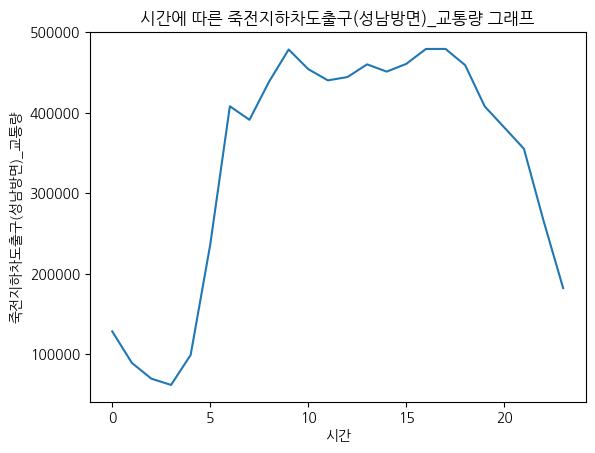

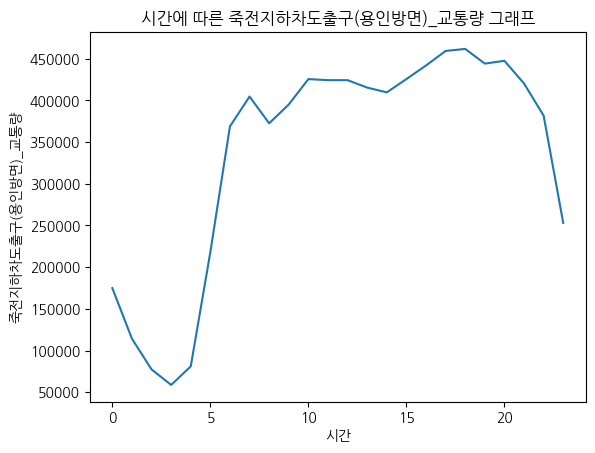

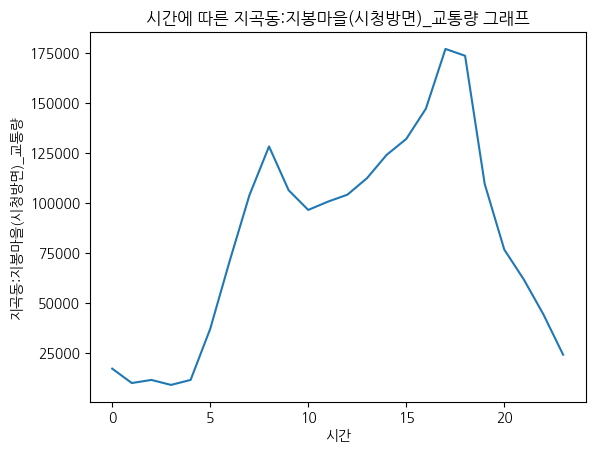

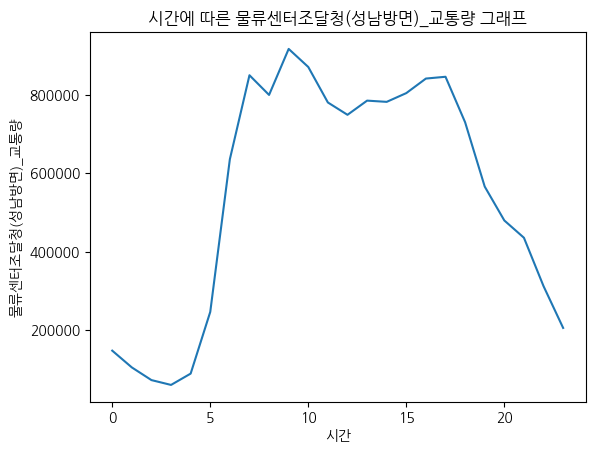

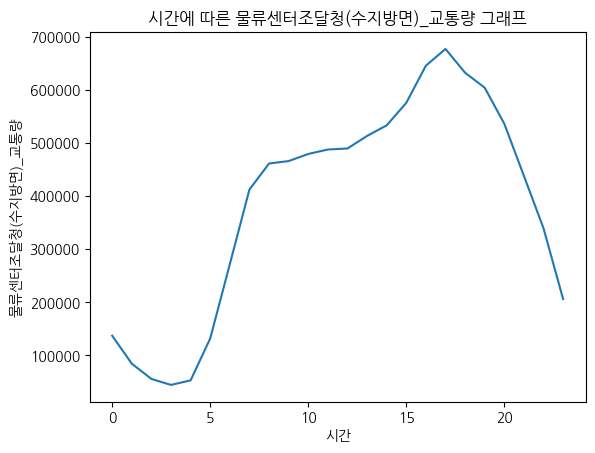

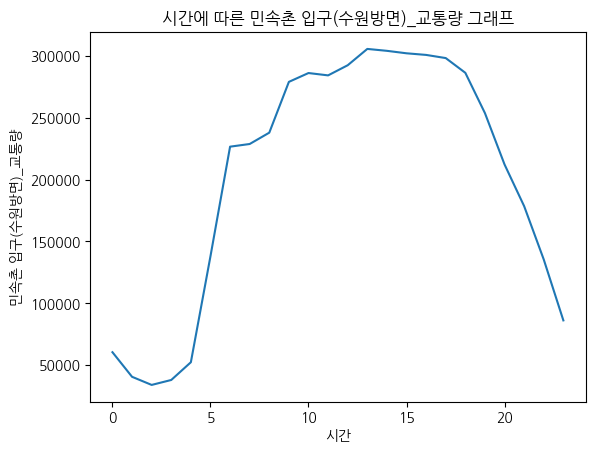

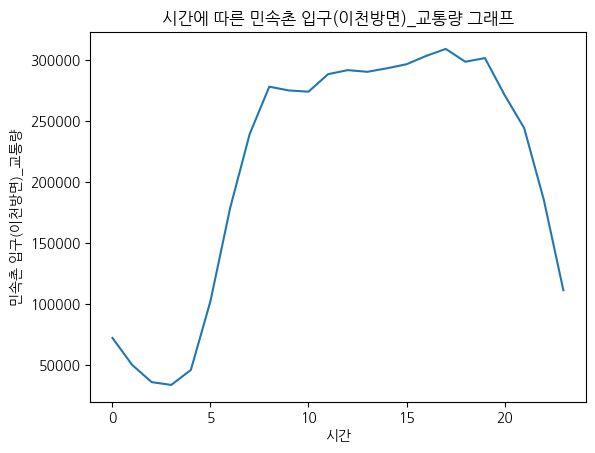

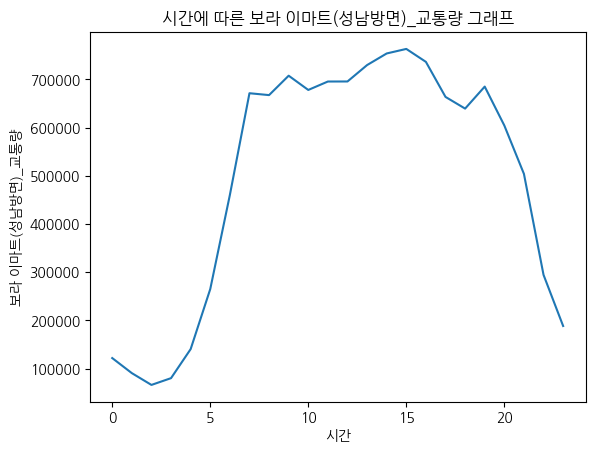

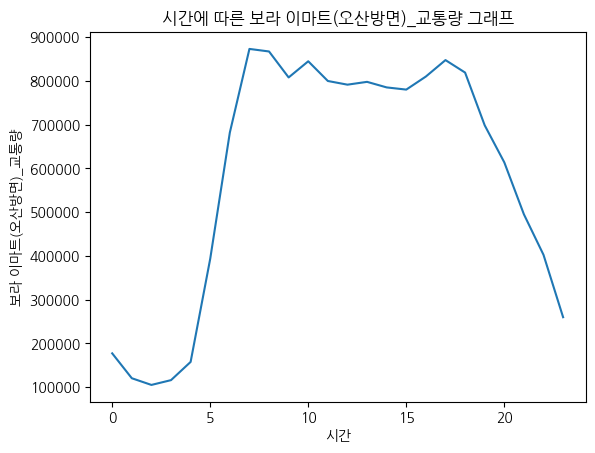

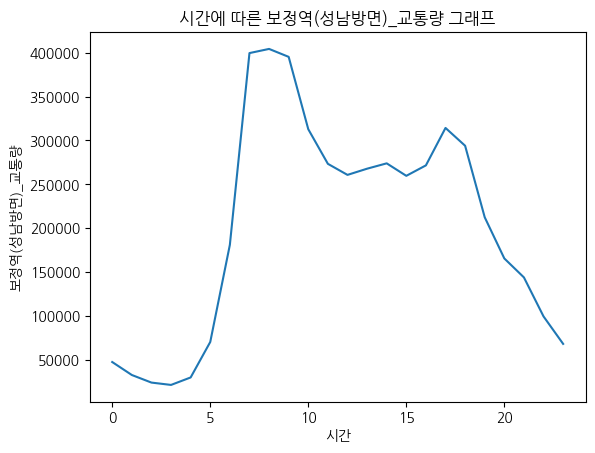

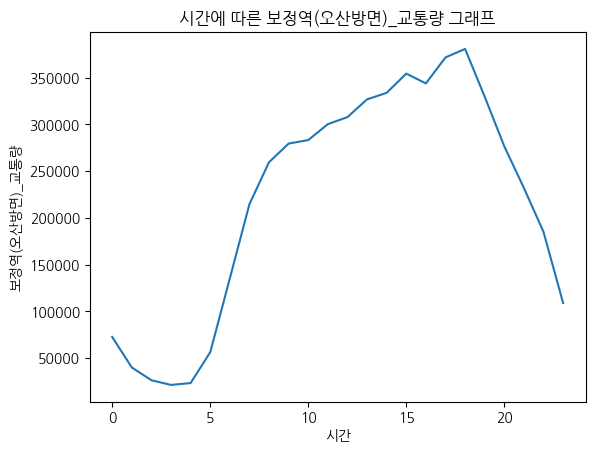

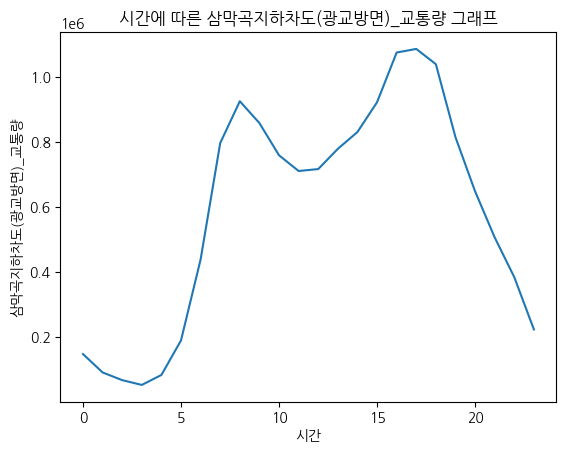

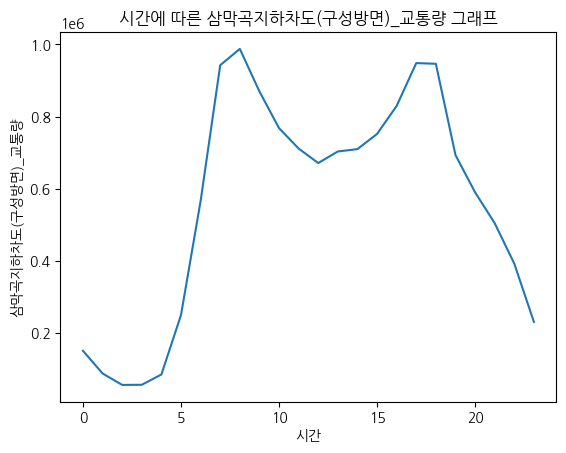

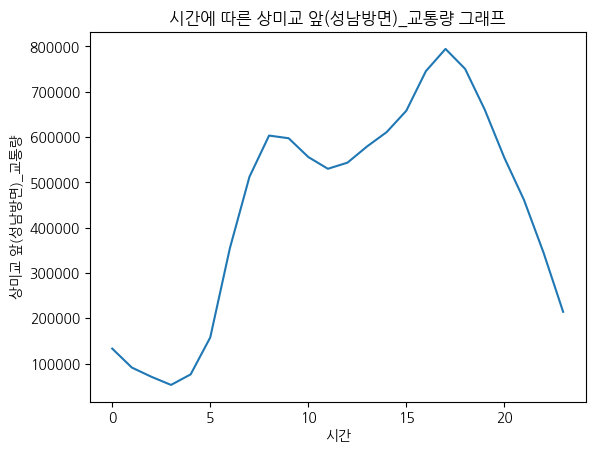

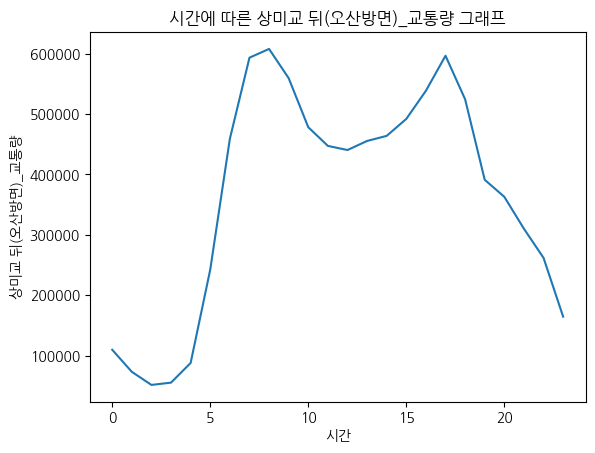

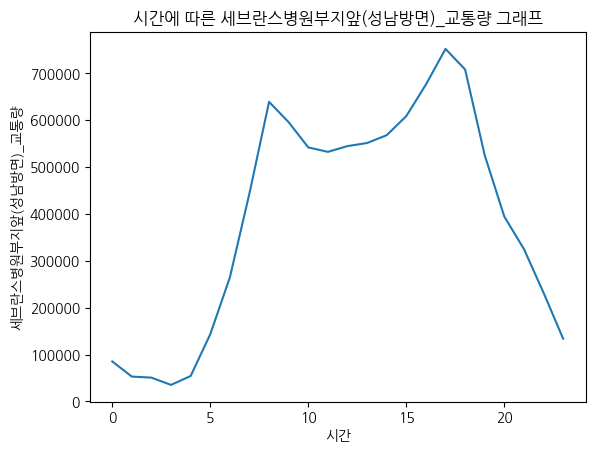

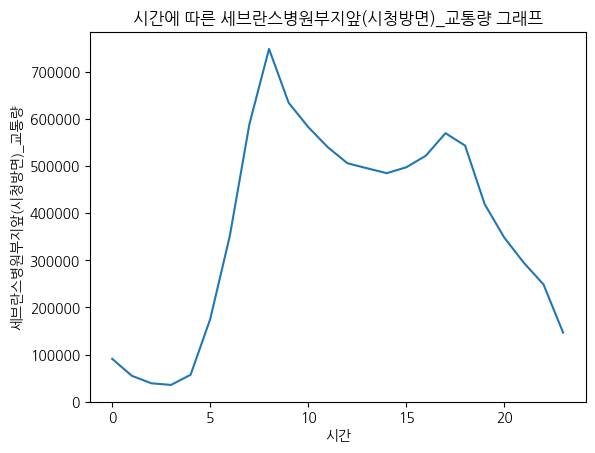

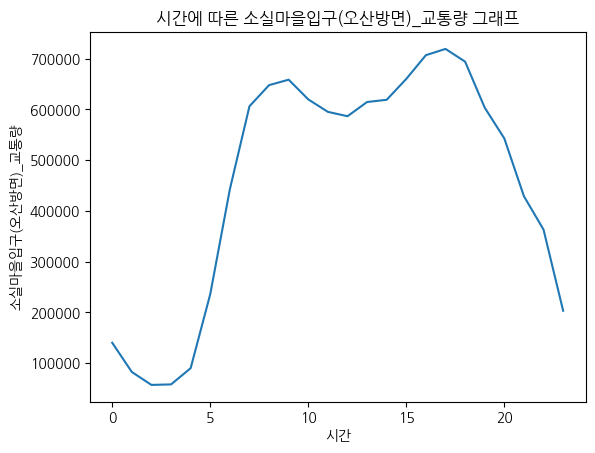

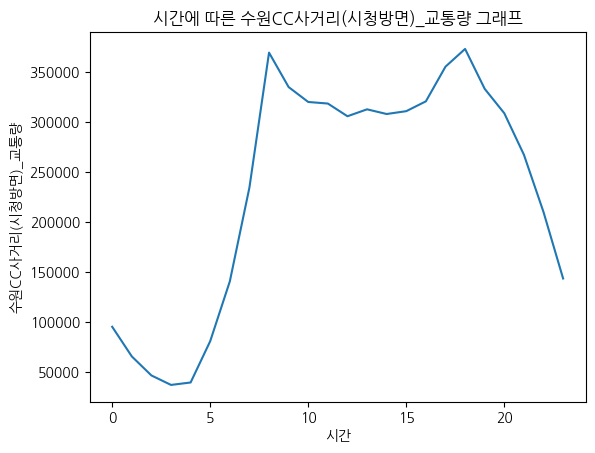

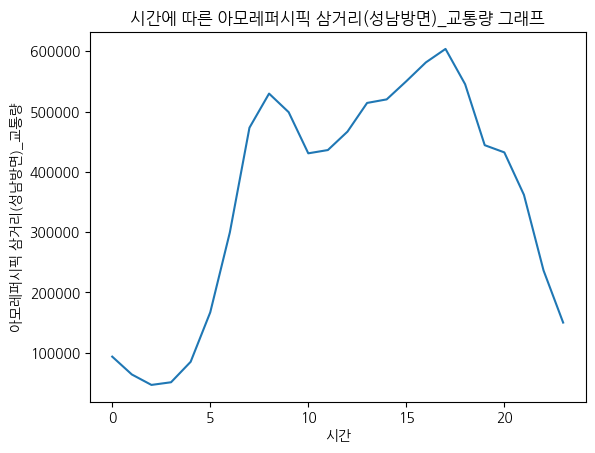

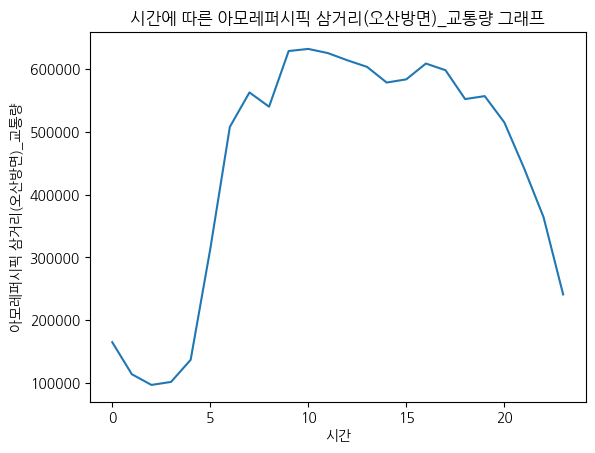

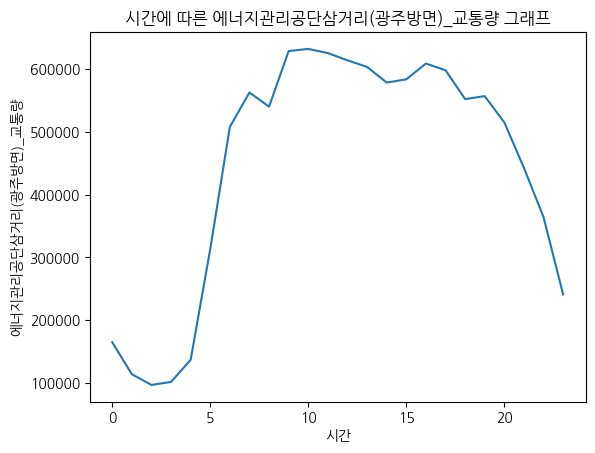

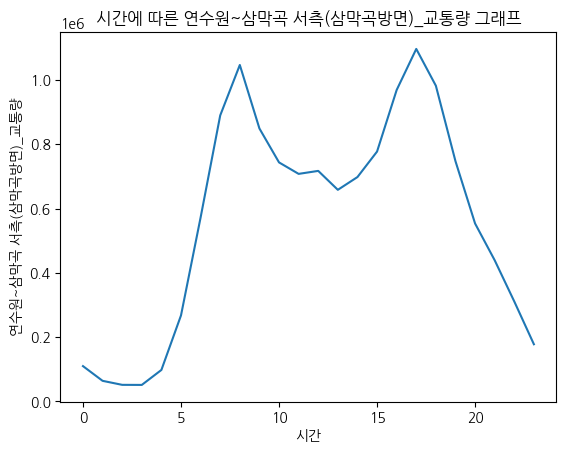

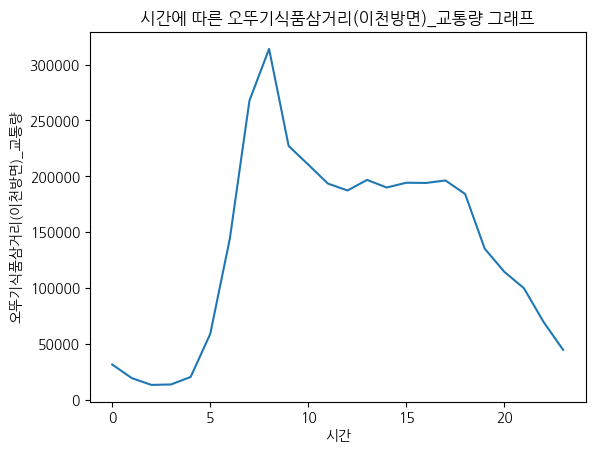

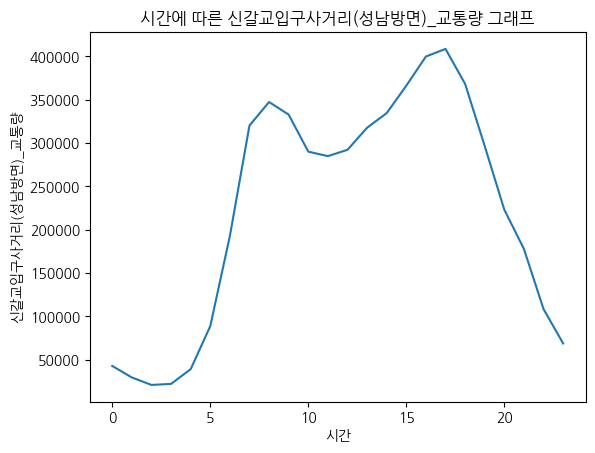

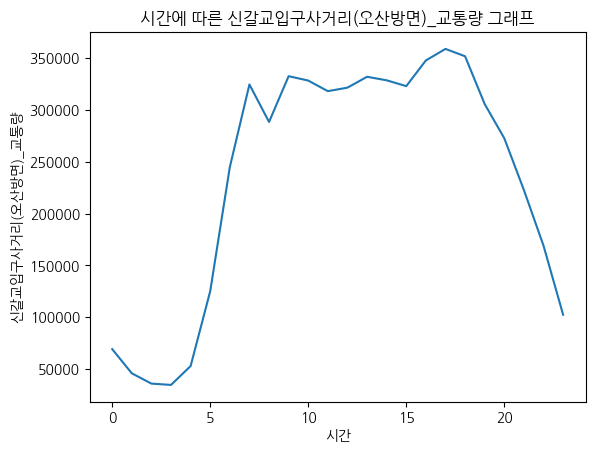

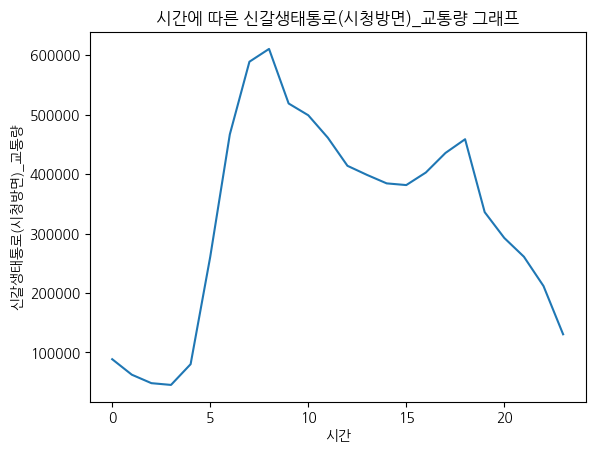

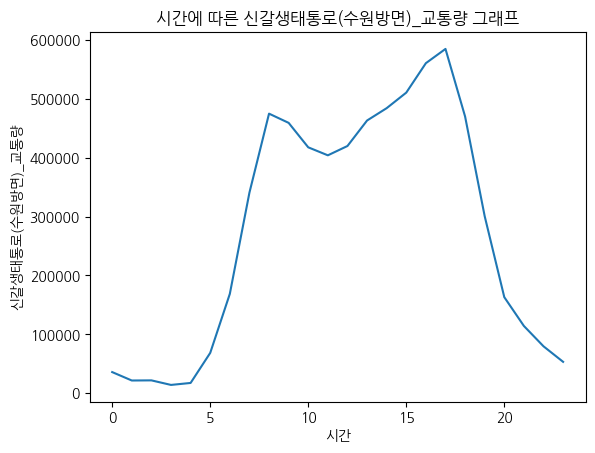

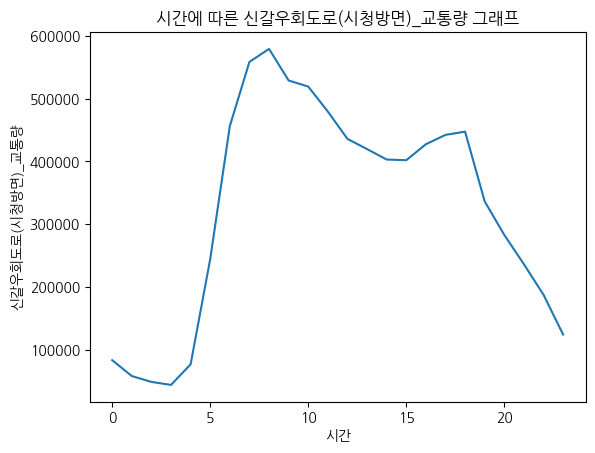

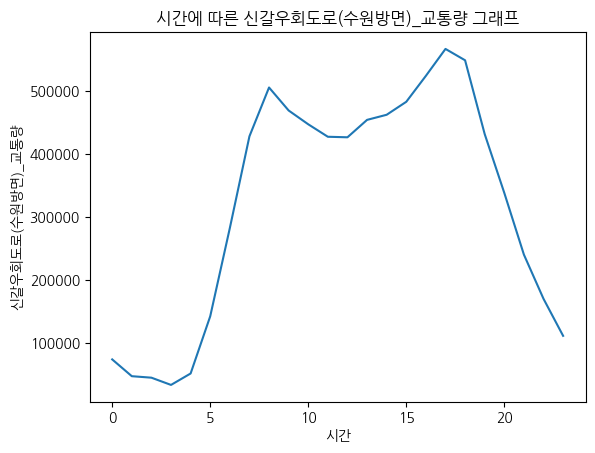

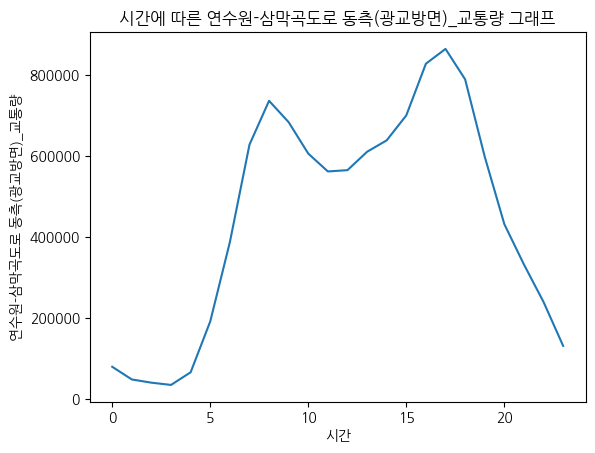

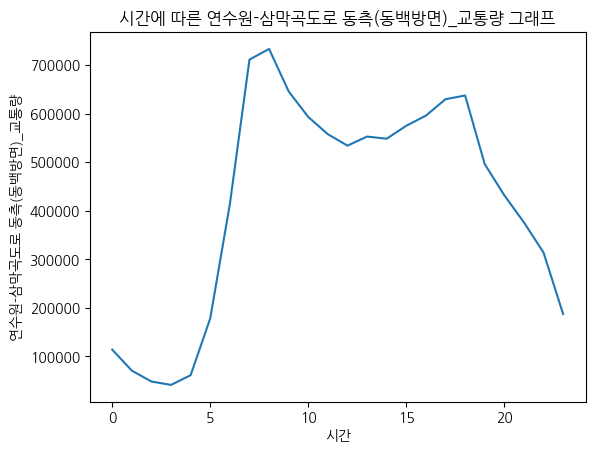

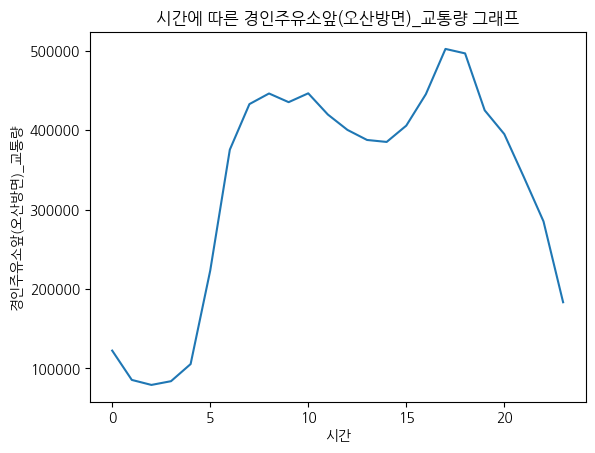

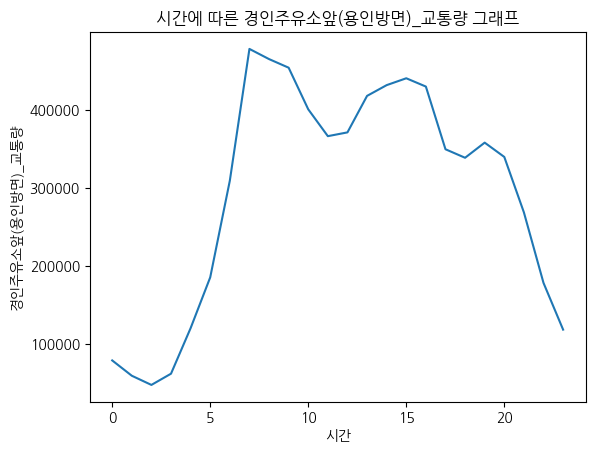

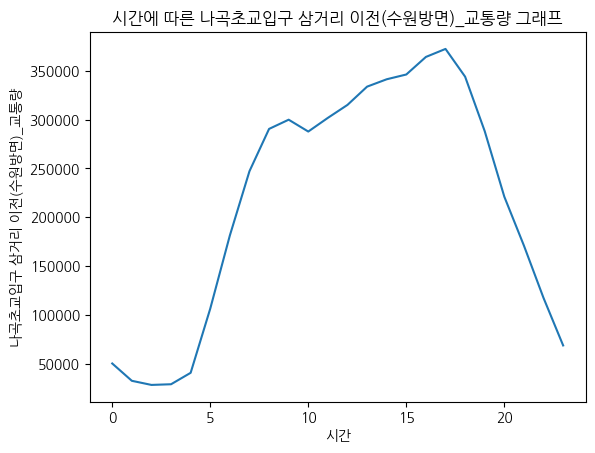

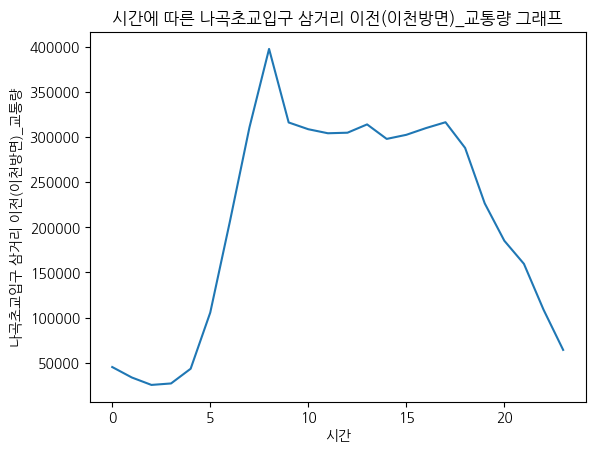

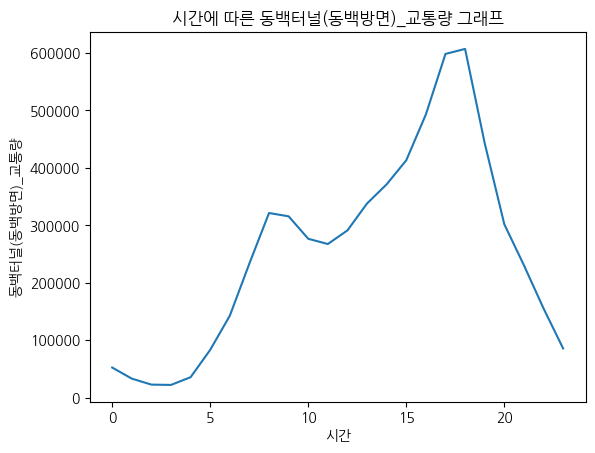

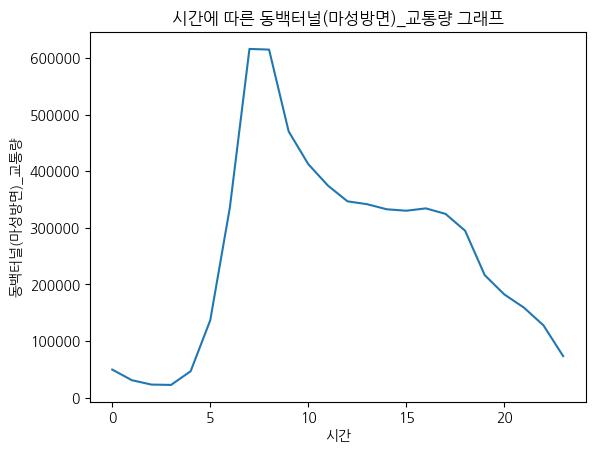

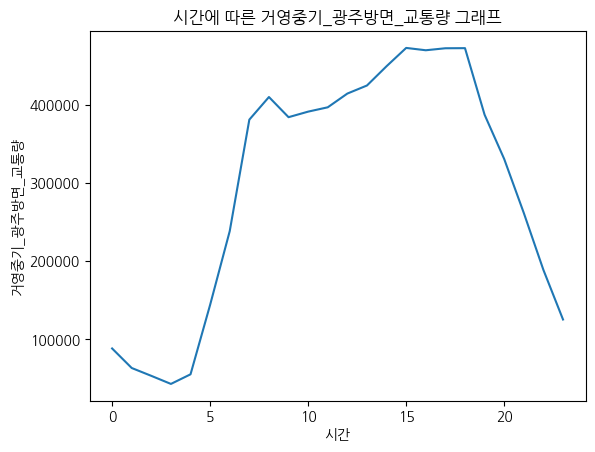

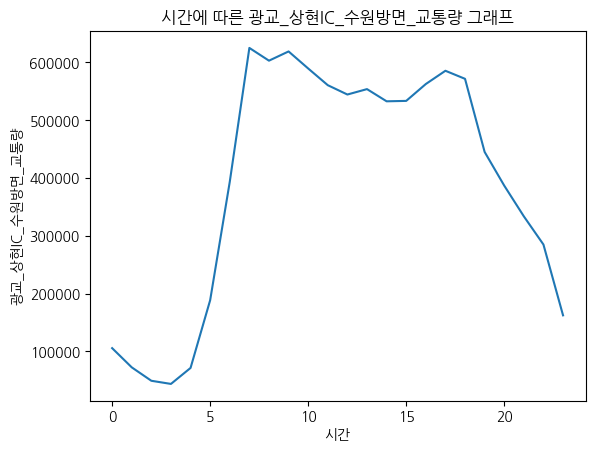

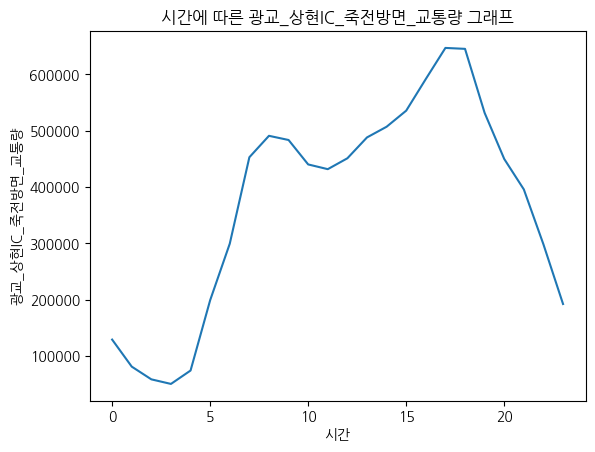

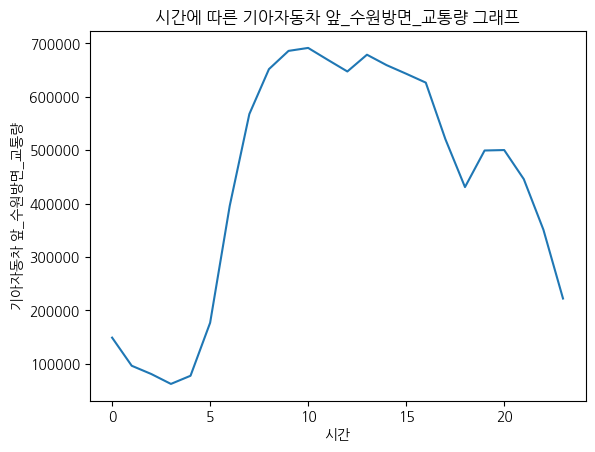

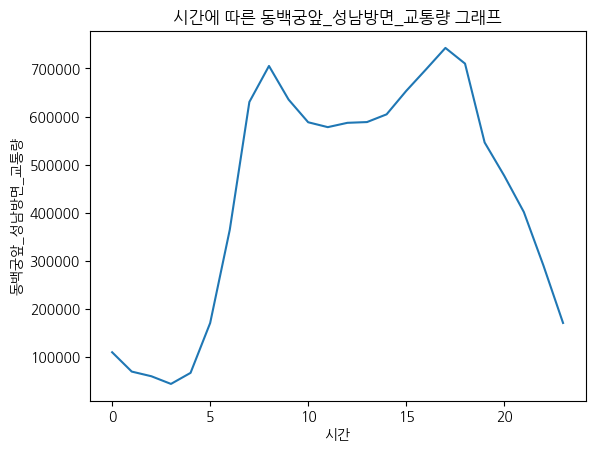

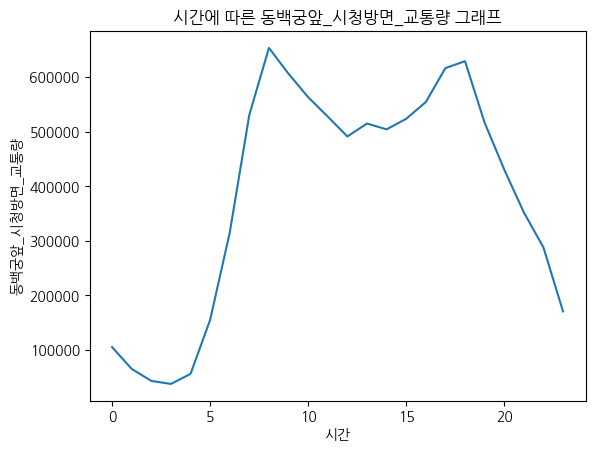

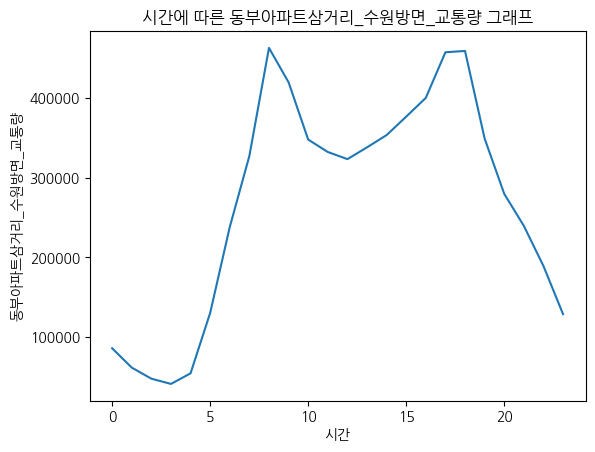

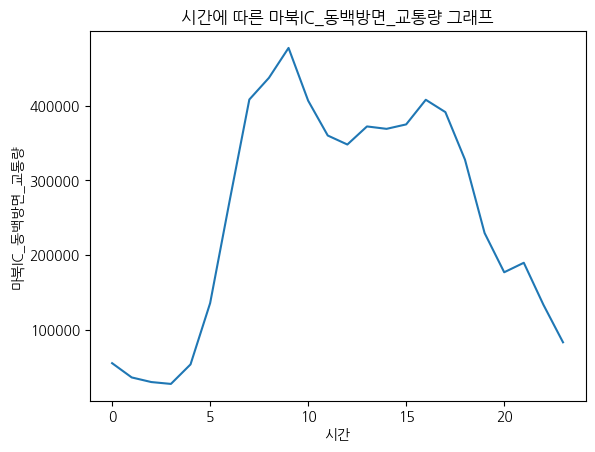

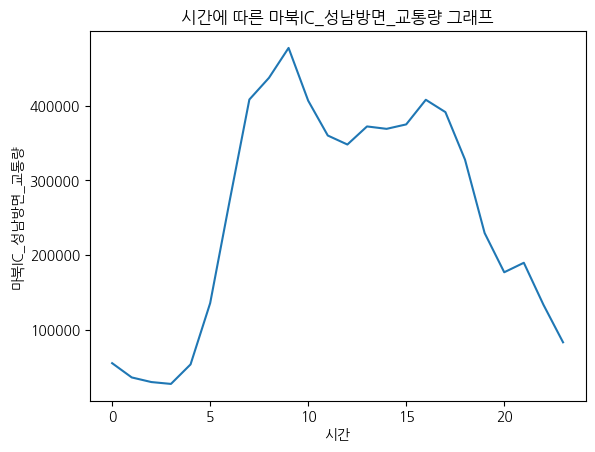

In [25]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글 폰트 다운로드 및 설치
!apt-get -qq install -y fonts-nanum

# matplotlib에서 한글 폰트 설정
plt.rcParams['font.family'] = 'NanumGothic'

df_mt = df[df['월~목'] == 1]
df_f = df[df['금'] == 1]
df_ss = df[df['주말'] == 1]

df_timegroup = df.groupby('시간').sum(numeric_only=True).reset_index()

for col in df.columns[['교통량' in col for col in df.columns]]:
    sns.lineplot(data=df_timegroup, x='시간', y=col)
    plt.title(f'시간에 따른 {col} 그래프')
    plt.xlabel('시간')
    plt.ylabel(col)
    plt.show()

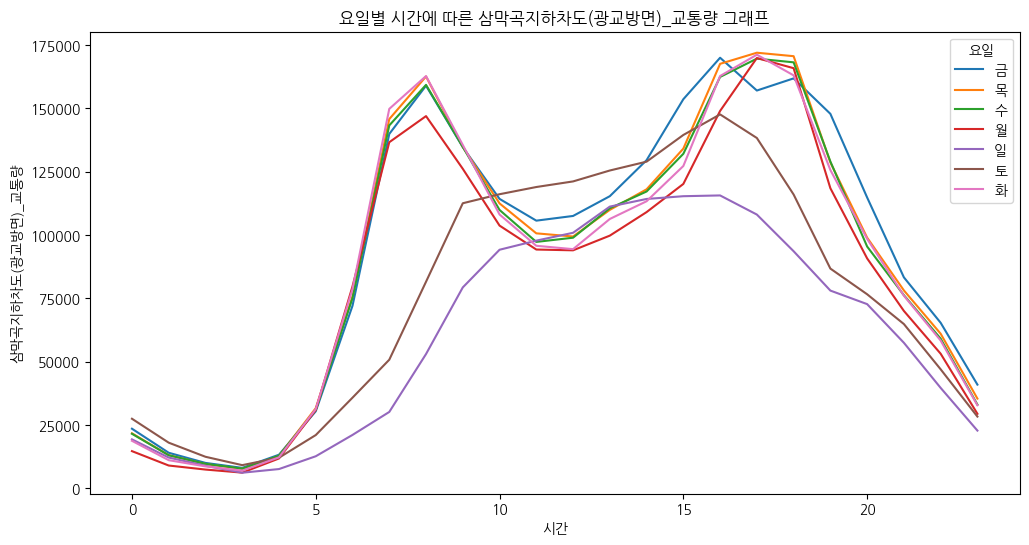

In [26]:
# '요일'과 '시간'을 기준으로 그룹화하여 교통량 합계 계산
df_time_group = df.groupby(['요일', '시간']).sum(numeric_only=True).reset_index()

# 그래프 그리기
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_time_group, x='시간', y='삼막곡지하차도(광교방면)_교통량', hue='요일', palette='tab10')
plt.title('요일별 시간에 따른 삼막곡지하차도(광교방면)_교통량 그래프')
plt.xlabel('시간')
plt.ylabel('삼막곡지하차도(광교방면)_교통량')
plt.legend(title='요일')
plt.show()

# 최종 사용 데이터

In [27]:
df1 = df.copy()
traffic = df1.filter(like='교통량')
traffic_list = ['아모레퍼시픽 삼거리(오산방면)_교통량', '나곡초교입구 삼거리 이전(수원방면)_교통량', '물류센터조달청(수지방면)_교통량', '동백궁앞_성남방면_교통량', '장애인복지관앞(성남방면)_교통량', '죽전2동 주민센터 앞(수원방면)_교통량', '삼막곡지하차도(구성방면)_교통량']
df2 = df[traffic_list]
df1.drop(traffic.columns, axis=1, inplace=True)
df_new = pd.concat([df1, df2], axis=1)
df_new

,날짜,시간,강수,강수형태,기온,습도,풍속,출퇴근시간,출근시간,퇴근시간,주말,공휴일,월~목,금,요일,아모레퍼시픽 삼거리(오산방면)_교통량,나곡초교입구 삼거리 이전(수원방면)_교통량,물류센터조달청(수지방면)_교통량,동백궁앞_성남방면_교통량,장애인복지관앞(성남방면)_교통량,죽전2동 주민센터 앞(수원방면)_교통량,삼막곡지하차도(구성방면)_교통량
0,2023-11-01,0.0,0.0,0.0,17.000000,85.0,0.8,0,0,0,0,0,1,0,수,511,168,441,335,287,505,529
1,2023-11-01,1.0,0.0,0.0,18.000000,83.0,0.7,0,0,0,0,0,1,0,수,382,105,271,196,237,285,327
2,2023-11-01,2.0,0.0,0.0,20.500000,76.0,1.4,0,0,0,0,0,1,0,수,338,81,176,179,186,220,199
3,2023-11-01,3.0,0.0,0.0,22.000000,70.0,1.6,0,0,0,0,0,1,0,수,319,87,136,151,154,233,204
4,2023-11-01,4.0,0.0,0.0,21.400000,72.0,0.9,0,0,0,0,0,1,0,수,423,126,185,237,291,310,311
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7987,2024-09-30,19.0,0.0,0.0,16.799999,98.0,0.8,1,0,1,0,0,1,0,월,1852,1010,2106,2168,992,1676,2604
7988,2024-09-30,20.0,0.0,0.0,17.500000,96.0,0.4,0,0,0,0,0,1,0,월,1799,813,1941,1665,888,1585,2130
7989,2024-09-30,21.0,0.0,1.0,17.900000,93.0,0.3,0,0,0,0,0,1,0,월,1468,597,1500,1379,802,1321,1829
7990,2024-09-30,22.0,0.0,1.0,18.200001,94.0,1.2,0,0,0,0,0,1,0,월,1129,511,1117,1028,542,1096,1400


1. 절대적 교통량: 이게 높으면 혼잡할 가능성이 높음. 개선 우선시 필요
2. 출퇴근 시간대 교통량 점수: 우리가 처음에 용인 출퇴근 지옥 어쩌고 넣었으니 이 시간대 교통량 급격히 증가하는 구간은 높은 우선순위를 둬야함(출근시간대 교통량/전체 평균 교통량이랑 퇴근시간대 교통량/전체 평균 교통량)
3. 변동성: 시간대별 교통량 변동이 클수록 도로가 특정시간대에 혼잡해질것임. 개선 필요성 높이는 주 요인중 하나. RSE도 쓰자. 교통량의 표준편차를 교통량의 평균으로 나누면됨. CV가 높을수록 변동성이 커서 특정시간대에 교통이 몰리는 경향이 강함.
4. 혼잡지수(가칭임): 출퇴근 시간의 교통량,전체시간대 평균교통량 ---- 이거 만들어서 수치화하면 나쁘지 않을

# 전체 교통량

In [28]:
df_weekend = df_new[df_new['주말'] == 0]
df_weekend_traffic = df_weekend.filter(like='교통량')
df_weekend_traffic_dict = {}
for col in df_weekend_traffic.columns:
    df_weekend_traffic_dict[col] = df_weekend_traffic[col].sum()
df_weekend_traffic_dict_sorted = dict(sorted(df_weekend_traffic_dict.items(), key=lambda item: item[1], reverse=True))
df_weekend_traffic_dict_sorted

{'삼막곡지하차도(구성방면)_교통량': 10449463,
 '아모레퍼시픽 삼거리(오산방면)_교통량': 8088519,
 '동백궁앞_성남방면_교통량': 8088073,
 '죽전2동 주민센터 앞(수원방면)_교통량': 7999883,
 '물류센터조달청(수지방면)_교통량': 7033051,
 '장애인복지관앞(성남방면)_교통량': 5572243,
 '나곡초교입구 삼거리 이전(수원방면)_교통량': 3945281}

# 출퇴근 시간대 교통량

In [29]:
# 1.출근 시간대 교통량
df_weekend_morning = df_weekend[df_weekend['출근시간'] == 1]
df_weekend_evening = df_weekend[df_weekend['퇴근시간'] == 1]
df_weekend_morning_traffic = df_weekend_morning.filter(like='교통량')
df_weekend_evening_traffic = df_weekend_evening.filter(like='교통량')
df_weekend_morning_traffic_dict = {}
df_weekend_evening_traffic_dict = {}

for col in df_weekend_morning_traffic.columns:
  df_weekend_morning_traffic_dict[col] = df_weekend_morning[col].sum()
  df_weekend_evening_traffic_dict[col] = df_weekend_evening[col].sum()

df_weekend_morning_traffic_dict_sorted = dict(sorted(df_weekend_morning_traffic_dict.items(), key=lambda item: item[1], reverse=True))
df_weekend_evening_traffic_dict_sorted = dict(sorted(df_weekend_evening_traffic_dict.items(), key=lambda item: item[1], reverse=True))
print(df_weekend_morning_traffic_dict_sorted)
print(df_weekend_evening_traffic_dict_sorted)


{'삼막곡지하차도(구성방면)_교통량': 1514510, '동백궁앞_성남방면_교통량': 1078358, '죽전2동 주민센터 앞(수원방면)_교통량': 969524, '아모레퍼시픽 삼거리(오산방면)_교통량': 908657, '물류센터조달청(수지방면)_교통량': 738836, '장애인복지관앞(성남방면)_교통량': 696607, '나곡초교입구 삼거리 이전(수원방면)_교통량': 475420}
{'삼막곡지하차도(구성방면)_교통량': 1327121, '동백궁앞_성남방면_교통량': 993932, '물류센터조달청(수지방면)_교통량': 957763, '죽전2동 주민센터 앞(수원방면)_교통량': 837199, '아모레퍼시픽 삼거리(오산방면)_교통량': 832718, '장애인복지관앞(성남방면)_교통량': 625323, '나곡초교입구 삼거리 이전(수원방면)_교통량': 488698}


# 전체 교통량에서 출퇴근 교통량 비율

In [30]:
morning_rate_dict = {}
evening_rate_dict = {}

df_weekend_morning_traffic_dict_sorted_sum = sum(df_weekend_morning_traffic_dict_sorted.values()) # Use sum() function with the values as an argument
df_weekend_evening_traffic_dict_sorted_sum = sum(df_weekend_evening_traffic_dict_sorted.values())
print(df_weekend_morning_traffic_dict_sorted_sum)
print(df_weekend_evening_traffic_dict_sorted_sum)

for col in df_weekend_morning_traffic.columns:
  morning_rate = df_weekend_morning_traffic_dict_sorted[col]/df_weekend_morning_traffic_dict_sorted_sum
  evening_rate =df_weekend_evening_traffic_dict_sorted[col]/df_weekend_evening_traffic_dict_sorted_sum
  morning_rate_dict[f'{col}의 출근 교통량 비율'] = morning_rate
  evening_rate_dict[f'{col}의 퇴근 교통량 비율'] = evening_rate

morning_rate_dict_sorted = dict(sorted(morning_rate_dict.items(), key=lambda item: item[1], reverse=True))
evening_rate_dict_sorted = dict(sorted(evening_rate_dict.items(), key=lambda item: item[1], reverse=True))
print(morning_rate_dict_sorted)
print(evening_rate_dict_sorted)

6381912
6062754
{'삼막곡지하차도(구성방면)_교통량의 출근 교통량 비율': 0.2373128930640222, '동백궁앞_성남방면_교통량의 출근 교통량 비율': 0.16897099176547717, '죽전2동 주민센터 앞(수원방면)_교통량의 출근 교통량 비율': 0.15191748178288889, '아모레퍼시픽 삼거리(오산방면)_교통량의 출근 교통량 비율': 0.14238005788860766, '물류센터조달청(수지방면)_교통량의 출근 교통량 비율': 0.11577032086935703, '장애인복지관앞(성남방면)_교통량의 출근 교통량 비율': 0.10915333837257549, '나곡초교입구 삼거리 이전(수원방면)_교통량의 출근 교통량 비율': 0.07449491625707155}
{'삼막곡지하차도(구성방면)_교통량의 퇴근 교통량 비율': 0.21889738557757746, '동백궁앞_성남방면_교통량의 퇴근 교통량 비율': 0.16394067778438642, '물류센터조달청(수지방면)_교통량의 퇴근 교통량 비율': 0.15797490711317003, '죽전2동 주민센터 앞(수원방면)_교통량의 퇴근 교통량 비율': 0.13808889491475326, '아모레퍼시픽 삼거리(오산방면)_교통량의 퇴근 교통량 비율': 0.1373497918602668, '장애인복지관앞(성남방면)_교통량의 퇴근 교통량 비율': 0.10314174053573673, '나곡초교입구 삼거리 이전(수원방면)_교통량의 퇴근 교통량 비율': 0.0806066022141093}


# 변동계수

In [31]:
cv_dict={}

for col in df_weekend_traffic.columns:
    cv = df_weekend_traffic[col].std()/df_weekend_traffic[col].mean()
    cv_dict[f'{col}의 변동계수'] = cv

cv_dict_sorted = dict(sorted(cv_dict.items(), key=lambda item: item[1], reverse=True))
cv_dict_sorted


{'삼막곡지하차도(구성방면)_교통량의 변동계수': 0.629119445683844,
 '동백궁앞_성남방면_교통량의 변동계수': 0.6248517696309681,
 '나곡초교입구 삼거리 이전(수원방면)_교통량의 변동계수': 0.6007362314623527,
 '물류센터조달청(수지방면)_교통량의 변동계수': 0.5527712871430562,
 '장애인복지관앞(성남방면)_교통량의 변동계수': 0.5455577326163986,
 '죽전2동 주민센터 앞(수원방면)_교통량의 변동계수': 0.5315105041740659,
 '아모레퍼시픽 삼거리(오산방면)_교통량의 변동계수': 0.4660512414819652}

In [32]:
cv_sum = sum(cv_dict_sorted.values())

cv_dict_sorted = {k: v/cv_sum for k, v in cv_dict_sorted.items()}
cv_dict_sorted

{'삼막곡지하차도(구성방면)_교통량의 변동계수': 0.15924662845799034,
 '동백궁앞_성남방면_교통량의 변동계수': 0.15816636774210568,
 '나곡초교입구 삼거리 이전(수원방면)_교통량의 변동계수': 0.15206209267455056,
 '물류센터조달청(수지방면)_교통량의 변동계수': 0.13992090753168707,
 '장애인복지관앞(성남방면)_교통량의 변동계수': 0.13809496772733174,
 '죽전2동 주민센터 앞(수원방면)_교통량의 변동계수': 0.13453924586248123,
 '아모레퍼시픽 삼거리(오산방면)_교통량의 변동계수': 0.11796979000385326}

## 교통 혼잡 지수 = a * 출근 교통량 점수 + b * 퇴근 교통량 점수 + c * 변동 계수 점수


In [33]:
complex_index = {}
a = 1/3
b = 1/3
c = 1/3
for col in df_weekend_traffic.columns:
    complex_index[col] = a*morning_rate_dict_sorted[f'{col}의 출근 교통량 비율'] + b*evening_rate_dict_sorted[f'{col}의 퇴근 교통량 비율'] + c*cv_dict_sorted[f'{col}의 변동계수']

past_complex_index_sorted = dict(sorted(complex_index.items(), key=lambda item: item[1], reverse=True))
past_complex_index_sorted

{'삼막곡지하차도(구성방면)_교통량': 0.20515230236652998,
 '동백궁앞_성남방면_교통량': 0.16369267909732307,
 '죽전2동 주민센터 앞(수원방면)_교통량': 0.1415152075200411,
 '물류센터조달청(수지방면)_교통량': 0.1378887118380714,
 '아모레퍼시픽 삼거리(오산방면)_교통량': 0.13256654658424255,
 '장애인복지관앞(성남방면)_교통량': 0.1167966822118813,
 '나곡초교입구 삼거리 이전(수원방면)_교통량': 0.10238787038191047}

In [34]:
import pandas as pd 
import numpy as np

In [35]:
predictions_df =pd.read_csv('predicted_Traffic_cluster.csv')
predictions_df.drop(axis=1, columns='Unnamed: 0', inplace= True)
predictions_df

,Cluster,Predicted_Traffic
0,predictions_cluster0,"[705.679, 1137.3872, 1389.1512, 1609.1453, 170..."
1,predictions_cluster1,"[121.39082, 184.81526, 282.00726, 371.0209, 47..."
2,predictions_cluster2,"[674.6291, 1111.7261, 1431.8231, 1787.7021, 20..."
3,predictions_cluster3,"[560.1144, 939.36383, 1362.9775, 1572.4202, 19..."
4,predictions_cluster4,"[308.03265, 465.41425, 745.1029, 874.99524, 10..."
5,predictions_cluster5,"[670.6562, 960.11633, 1341.9135, 1626.4347, 18..."
6,predictions_cluster6,"[816.76746, 1328.3944, 1700.3038, 2020.5142, 2..."


In [36]:
predictions_df['Predicted_Traffic'] = predictions_df['Predicted_Traffic'].str.replace('[', '', regex=False).str.replace(']', '', regex=False)
predictions_df

,Cluster,Predicted_Traffic
0,predictions_cluster0,"705.679, 1137.3872, 1389.1512, 1609.1453, 1703..."
1,predictions_cluster1,"121.39082, 184.81526, 282.00726, 371.0209, 475..."
2,predictions_cluster2,"674.6291, 1111.7261, 1431.8231, 1787.7021, 203..."
3,predictions_cluster3,"560.1144, 939.36383, 1362.9775, 1572.4202, 194..."
4,predictions_cluster4,"308.03265, 465.41425, 745.1029, 874.99524, 101..."
5,predictions_cluster5,"670.6562, 960.11633, 1341.9135, 1626.4347, 183..."
6,predictions_cluster6,"816.76746, 1328.3944, 1700.3038, 2020.5142, 25..."


In [37]:
result_data = []

for idx, row in predictions_df.iterrows():
    cluster = row['Cluster']
    traffic_values = row['Predicted_Traffic'].split(', ')  # 콤마로 분리
    for value in traffic_values:
        result_data.append({'Cluster': cluster, 'Predicted_Traffic': float(value)})  # 값을 float로 변환
# 결과 데이터프레임 생성
result_df = pd.DataFrame(result_data)

# 결과 확인
result_df

,Cluster,Predicted_Traffic
0,predictions_cluster0,705.67900
1,predictions_cluster0,1137.38720
2,predictions_cluster0,1389.15120
3,predictions_cluster0,1609.14530
4,predictions_cluster0,1703.98290
...,...,...
5035,predictions_cluster6,1521.92140
5036,predictions_cluster6,1337.89140
5037,predictions_cluster6,1081.41720
5038,predictions_cluster6,757.65270


In [38]:
df_0=result_df[result_df['Cluster']=='predictions_cluster0']['Predicted_Traffic']
df_1=result_df[result_df['Cluster']=='predictions_cluster1']['Predicted_Traffic']
df_2=result_df[result_df['Cluster']=='predictions_cluster2']['Predicted_Traffic']
df_3=result_df[result_df['Cluster']=='predictions_cluster3']['Predicted_Traffic']
df_4=result_df[result_df['Cluster']=='predictions_cluster4']['Predicted_Traffic']
df_5=result_df[result_df['Cluster']=='predictions_cluster5']['Predicted_Traffic']
df_6=result_df[result_df['Cluster']=='predictions_cluster6']['Predicted_Traffic']
df = pd.DataFrame({
    'Cluster_0': df_0.reset_index(drop=True),
    'Cluster_1': df_1.reset_index(drop=True),
    'Cluster_2': df_2.reset_index(drop=True),
    'Cluster_3': df_3.reset_index(drop=True),
    'Cluster_4': df_4.reset_index(drop=True),
    'Cluster_5': df_5.reset_index(drop=True),
    'Cluster_6': df_6.reset_index(drop=True),
})
date_range = pd.date_range(start="2024-10-01 00:00", end="2024-10-30 23:00", freq="H")
date_range = date_range[:720]
df.index = date_range
df.index.name = "DateTime"
df

C:\Users\yeonn\AppData\Local\Temp\ipykernel_32664\2736783369.py:17: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  date_range = pd.date_range(start="2024-10-01 00:00", end="2024-10-30 23:00", freq="H")


,Cluster_0,Cluster_1,Cluster_2,Cluster_3,Cluster_4,Cluster_5,Cluster_6
DateTime,,,,,,,
2024-10-01 00:00:00,705.6790,121.39082,674.62910,560.11440,308.03265,670.65620,816.76746
2024-10-01 01:00:00,1137.3872,184.81526,1111.72610,939.36383,465.41425,960.11633,1328.39440
2024-10-01 02:00:00,1389.1512,282.00726,1431.82310,1362.97750,745.10290,1341.91350,1700.30380
2024-10-01 03:00:00,1609.1453,371.02090,1787.70210,1572.42020,874.99524,1626.43470,2020.51420
2024-10-01 04:00:00,1703.9829,475.68880,2038.16300,1945.78160,1013.51917,1833.98140,2570.96440
...,...,...,...,...,...,...,...
2024-10-30 19:00:00,1818.1467,705.74710,1453.54970,1662.50610,1415.05550,2031.92710,1521.92140
2024-10-30 20:00:00,1697.7943,449.78662,1311.13660,1452.08060,1471.49500,1933.07690,1337.89140
2024-10-30 21:00:00,1549.3606,257.53534,1131.46720,1221.08280,1537.09120,1627.33580,1081.41720


In [39]:
df['요일'] = df.index.day_name()
df_weekdays= df[df['요일'].isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday','Friday'])]
df_weekdays.drop(axis=1,columns='요일',inplace=True)
df_weekdays

C:\Users\yeonn\AppData\Local\Temp\ipykernel_32664\4039123766.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_weekdays.drop(axis=1,columns='요일',inplace=True)


,Cluster_0,Cluster_1,Cluster_2,Cluster_3,Cluster_4,Cluster_5,Cluster_6
DateTime,,,,,,,
2024-10-01 00:00:00,705.6790,121.39082,674.62910,560.11440,308.03265,670.65620,816.76746
2024-10-01 01:00:00,1137.3872,184.81526,1111.72610,939.36383,465.41425,960.11633,1328.39440
2024-10-01 02:00:00,1389.1512,282.00726,1431.82310,1362.97750,745.10290,1341.91350,1700.30380
2024-10-01 03:00:00,1609.1453,371.02090,1787.70210,1572.42020,874.99524,1626.43470,2020.51420
2024-10-01 04:00:00,1703.9829,475.68880,2038.16300,1945.78160,1013.51917,1833.98140,2570.96440
...,...,...,...,...,...,...,...
2024-10-30 19:00:00,1818.1467,705.74710,1453.54970,1662.50610,1415.05550,2031.92710,1521.92140
2024-10-30 20:00:00,1697.7943,449.78662,1311.13660,1452.08060,1471.49500,1933.07690,1337.89140
2024-10-30 21:00:00,1549.3606,257.53534,1131.46720,1221.08280,1537.09120,1627.33580,1081.41720


In [40]:
commute_morning = df_weekdays.between_time('07:00', '09:59')

# 퇴근 시간대 (17:00 ~ 19:59) 필터링
commute_evening = df_weekdays.between_time('17:00', '19:59')

# 결과 출력
print("출근 시간대 교통량:")
print(commute_morning)

print("\n퇴근 시간대 교통량:")
print(commute_evening)

출근 시간대 교통량:
                      Cluster_0  Cluster_1  Cluster_2  Cluster_3   Cluster_4  \
DateTime                                                                       
2024-10-01 07:00:00  1970.44460  915.41376  2143.0107  2423.2097  1552.46330   
2024-10-01 08:00:00  1847.05970  842.52980  1896.3829  2246.2720  1487.39720   
2024-10-01 09:00:00  1850.76460  824.32434  1741.7996  2137.2140  1444.33650   
2024-10-02 07:00:00  1929.60270  736.57684  2023.7242  1958.2997  1562.15270   
2024-10-02 08:00:00  2009.65940  776.73320  1956.8623  2107.0770  1495.57010   
...                         ...        ...        ...        ...         ...   
2024-10-29 08:00:00  1133.67130  559.82684  1507.0251  1362.9355   662.33734   
2024-10-29 09:00:00  1274.82410  786.41376  1778.1552  1650.4722   859.06964   
2024-10-30 07:00:00   759.52783  375.74475   913.0188   770.0350   385.41138   
2024-10-30 08:00:00   929.29080  546.70703  1237.6284  1053.6720   543.16156   
2024-10-30 09:00:00  1086.76

In [41]:
# 클러스터별 출근 시간대 교통량 합계 계산
morning_sum = commute_morning.sum().reset_index()
morning_sum.columns = ['Cluster', 'Morning_Traffic']

# 클러스터별 퇴근 시간대 교통량 합계 계산
evening_sum = commute_evening.sum().reset_index()
evening_sum.columns = ['Cluster', 'Evening_Traffic']

# 결과 출력
print("출근 시간대 교통량 합계:")
print(morning_sum)

print("\n퇴근 시간대 교통량 합계:")
print(evening_sum)

출근 시간대 교통량 합계:
     Cluster  Morning_Traffic
0  Cluster_0      95126.94241
1  Cluster_1      50744.16984
2  Cluster_2     121949.85460
3  Cluster_3     130581.08090
4  Cluster_4      76611.57625
5  Cluster_5     121907.11041
6  Cluster_6     168379.43770

퇴근 시간대 교통량 합계:
     Cluster  Evening_Traffic
0  Cluster_0    111241.446100
1  Cluster_1     39200.627806
2  Cluster_2     76695.467710
3  Cluster_3    103906.574820
4  Cluster_4     78382.380010
5  Cluster_5     93633.478640
6  Cluster_6    121635.926300


In [42]:
df_weekdays_sum = df_weekdays.sum().reset_index()
df_weekdays_sum.columns = ['Cluster', 'total_traffic']
df_weekdays_sum

,Cluster,total_traffic
0,Cluster_0,704831.441780
1,Cluster_1,281614.611793
2,Cluster_2,657189.559880
3,Cluster_3,751869.393530
4,Cluster_4,511941.845590
5,Cluster_5,723562.698470
6,Cluster_6,898601.697510


출퇴근 교통지수 산출

In [43]:
import pandas as pd


# 출근 시간대 비율 계산
morning_rate = morning_sum['Morning_Traffic'] / df_weekdays_sum['total_traffic']
morning_rate = morning_rate.fillna(0)  # NaN을 0으로 대체

# 퇴근 시간대 비율 계산
evening_rate = evening_sum['Evening_Traffic'] / df_weekdays_sum['total_traffic']
evening_rate = evening_rate.fillna(0)  # NaN을 0으로 대체

# 결과 출력
print("출근 시간대 비율:")
print(morning_rate)

print("\n퇴근 시간대 비율:")
print(evening_rate)


출근 시간대 비율:
0    0.134964
1    0.180190
2    0.185563
3    0.173675
4    0.149649
5    0.168482
6    0.187379
dtype: float64

퇴근 시간대 비율:
0    0.157827
1    0.139200
2    0.116702
3    0.138198
4    0.153108
5    0.129406
6    0.135361
dtype: float64


변동계수 산출

In [44]:
cv_dict={}

for col in df_weekdays.columns:
    cv = df_weekdays[col].std()/df_weekdays[col].mean()
    cv_dict[f'{col}의 변동계수'] = cv

cv_dict_sorted = dict(sorted(cv_dict.items(), key=lambda item: item[1], reverse=True))
cv_dict_sorted
cv_sum = sum(cv_dict_sorted.values())

cv_dict_sorted = {k: v/cv_sum for k, v in cv_dict_sorted.items()}
cv_dict_sorted

{'Cluster_1의 변동계수': 0.17703146175550552,
 'Cluster_6의 변동계수': 0.15354261954879708,
 'Cluster_3의 변동계수': 0.15143015707504046,
 'Cluster_4의 변동계수': 0.13864279010930927,
 'Cluster_2의 변동계수': 0.13488007355228568,
 'Cluster_5의 변동계수': 0.1313304014001294,
 'Cluster_0의 변동계수': 0.11314249655893255}

교통 혼잡도 지수 산출

In [45]:
complex_index = {}
a = 1/3
b = 1/3
c = 1/3

# df_weekdays의 각 열에 대해 복합 지수 계산
for i, col in enumerate(df_weekdays.columns):
    # 변동계수 가져오기 (딕셔너리로 가정)
    cv_value = cv_dict_sorted.get(f'{col}의 변동계수', 0)  # 기본값 0 설정
    complex_index[col] = a * morning_rate[i] + b * evening_rate[i] + c * cv_value

# 복합 지수 정렬
complex_index_sorted = dict(sorted(complex_index.items(), key=lambda item: item[1], reverse=True))

# 결과 출력
print(complex_index_sorted)

{'Cluster_1': 0.16547371025168153, 'Cluster_6': 0.15876111509419827, 'Cluster_3': 0.15443433796691014, 'Cluster_4': 0.14713324964080698, 'Cluster_2': 0.14571498393698668, 'Cluster_5': 0.14307277463534715, 'Cluster_0': 0.13531120611554032}


In [51]:
# 앞서 모델링에서 산출했었던 클러스터 별 RMSE, MAE, R² 
rmse_values = [211.1580288258577, 130.57875769174177, 185.34876582936587, 364.4385085961596, 223.7464119745672, 274.59876309910345, 260.3843997424632]
mae_values = [148.24834511039597, 83.2936574788807, 120.04985375174898, 227.2764027135971, 150.56649343230336, 173.96906023522152, 173.41618385138918]
r2_values = [0.8820645998343134, 0.8820622492137775, 0.9160092548493519, 0.7926015318378518, 0.7802819653338389, 0.8372698956356881, 0.9360128175997562]

# R²를 곱한 새로운 복합 지수 생성
future_weighted_complex_index = {}

for i, (cluster, value) in enumerate(complex_index_sorted.items()):
    future_weighted_complex_index[cluster] = value * r2_values[i]

# 결과 출력
print(future_weighted_complex_index)


{'Cluster_1': 0.1459585020162486, 'Cluster_6': 0.14003718626767592, 'Cluster_3': 0.14146328284422233, 'Cluster_4': 0.11661803904958466, 'Cluster_2': 0.11369877404494072, 'Cluster_5': 0.11979052708724543, 'Cluster_0': 0.12665302328902825}


최종 교통 혼합도 지수 산출

In [ ]:
{'삼막곡지하차도(구성방면)_교통량': 0.20515230236652998,
 '동백궁앞_성남방면_교통량': 0.16369267909732307,
 '죽전2동 주민센터 앞(수원방면)_교통량': 0.1415152075200411,
 '물류센터조달청(수지방면)_교통량': 0.1378887118380714,
 '아모레퍼시픽 삼거리(오산방면)_교통량': 0.13256654658424255,
 '장애인복지관앞(성남방면)_교통량': 0.1167966822118813,
 '나곡초교입구 삼거리 이전(수원방면)_교통량': 0.10238787038191047}

클러스터/지수	기존 	예측	최종\
Clsuter0	0.132	0.1266	0.2586\
Clsuter1	0.102	0.1459	0.2479\
Clsuter2	0.137	0.1	0.237\
Clsuter3	0.1636	0.1414	0.3050\
Clsuter4	0.1167	0.1166	0.2333\
Clsuter5	0.1415	0.1197	0.2612\
Clsuter6	0.2051	0.1400	0.3451\
